In [303]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from random import choice


In [304]:
data = pd.read_csv('lung cancer survey.csv')
data.head(100)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,60,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
96,F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
97,M,59,2,1,1,2,1,1,1,1,2,2,2,1,1,YES
98,M,64,1,2,2,2,1,2,2,1,1,2,1,2,1,YES


since most of all data i boolean values and are true or false but they are between 1 and 2 we need to decrease all og them by one and we don't need and label encoder or something else just simple math operation

In [305]:

for column in data.columns.to_list():
    if column not in ['GENDER','AGE','LUNG_CANCER']:
        data[column] =data[column] - 1


here we got gender data no null value just M and F data but since or data can't train on this we need to label  it numeric so model we use can work with it 

In [306]:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
gender = data['GENDER']
result = label.fit_transform(gender)
data['GENDER'] = result


well here we don't do somthing strange just rescale our data between 1 and 0 

In [307]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_of_age = data['AGE']
data_of_age = np.array(data_of_age)
data_of_age = data_of_age.reshape(-1, 1)
data.AGE = scaler.fit_transform(data_of_age)

well after we finished preprocessing our input data maybe it's time to make some changes to prediction output 
here we just label or data to 0 and 1 other than it's actual value yes and no 

In [ ]:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
have_cancer = data['LUNG_CANCER']
result = label.fit_transform(have_cancer)
data['LUNG_CANCER'] = result


well before we jump to what we did here lets see something down there
this is corr matrix show relationship between parameters and so on i decided to remove some parameters and don't use it on model since it's don't have major effect on lung cancer
but you might ask why i kept smoking it's seem have no effect on number it's true but on real life it's not

In [309]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


i removed some attribute here

In [310]:

all_attributes = list(data)
need_excluded_attributes = ['AGE', 'GENDER', 'CHRONIC DISEASE', 'SHORTNESS OF BREATH']
def remove_attr(items_to_remove:list[str])->list[str]:
    """items remove get list of attributes and them it's remove them from all all_att
    reminder if you don't understand what trick happen here then let's just say when you call list on data that is a dataframe (in pandas)
    it get all of their headers name and return a list of attributes name of data set
    """
    all_att = list(data)
    for remove_item in items_to_remove:
        all_att.remove(remove_item)
    return all_att

new_all_attributes = remove_attr(need_excluded_attributes)
new_all_attributes.remove('LUNG_CANCER')

 a bar chart of data et nothing special about it 

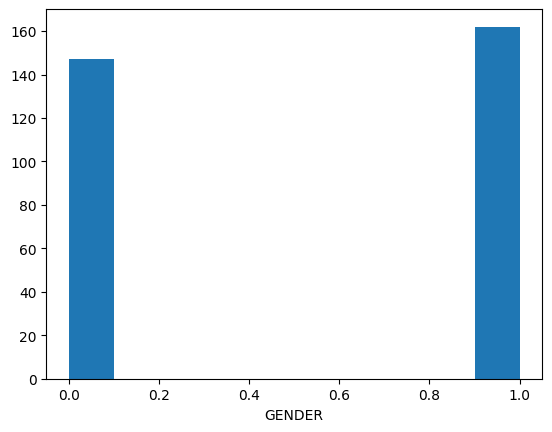

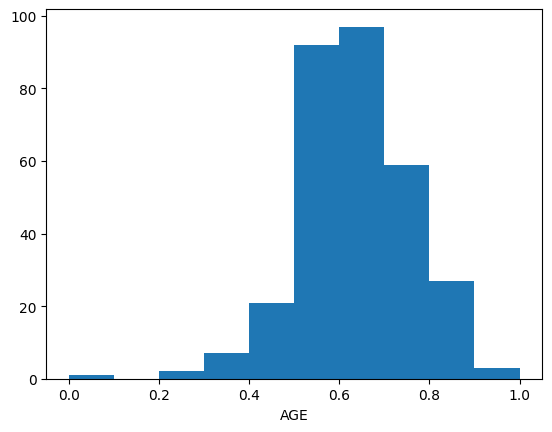

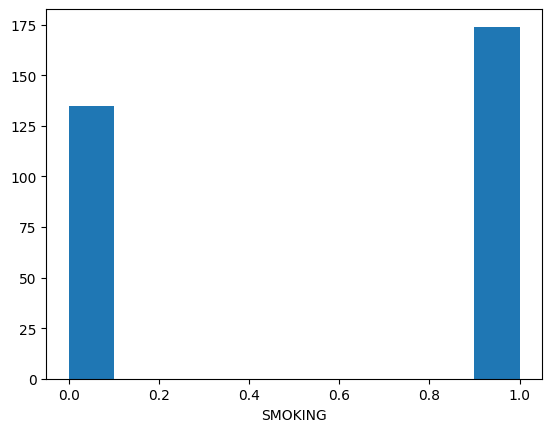

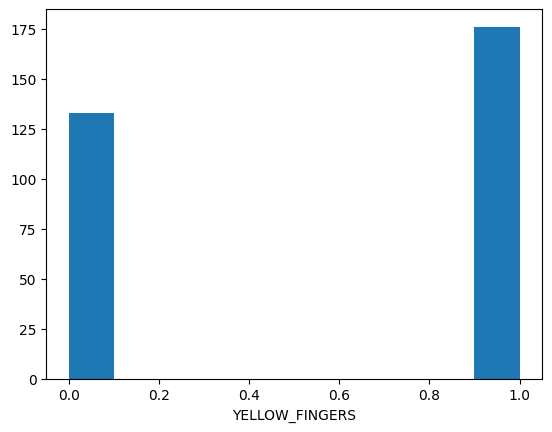

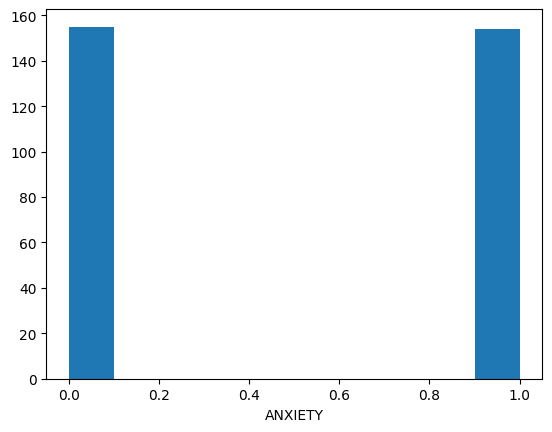

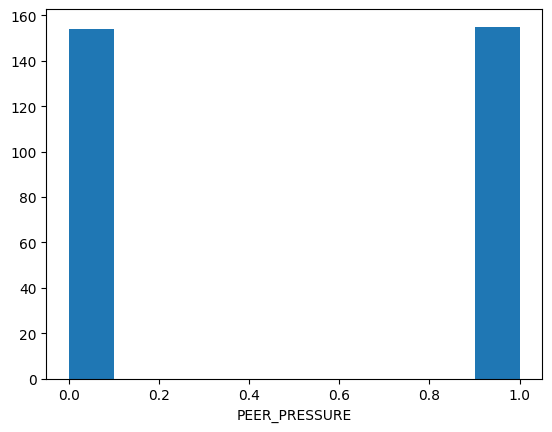

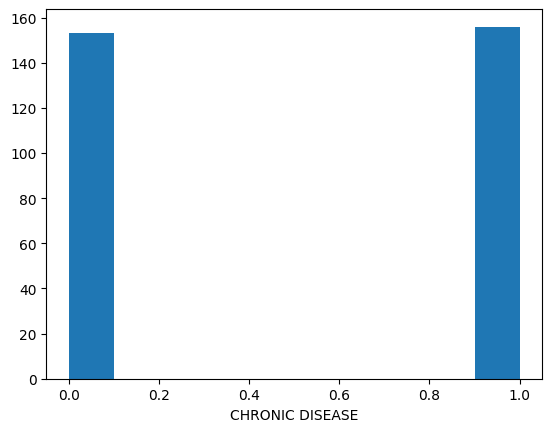

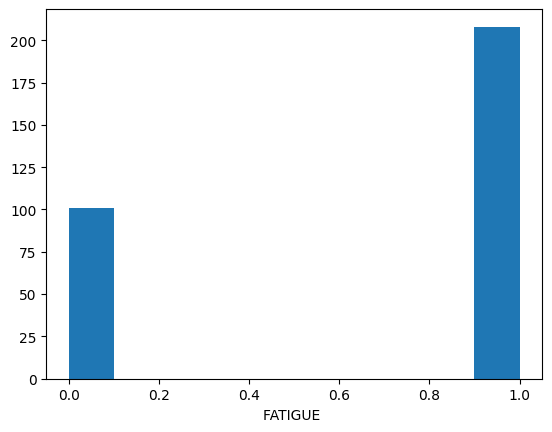

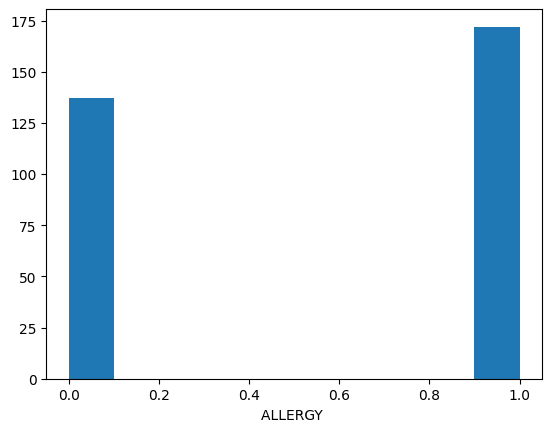

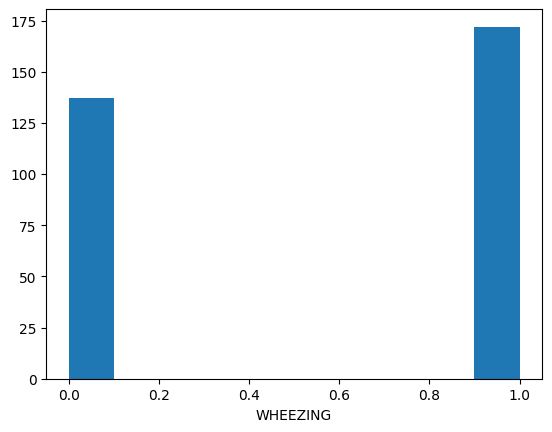

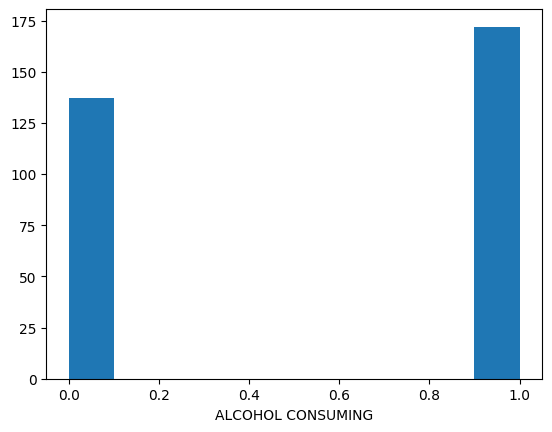

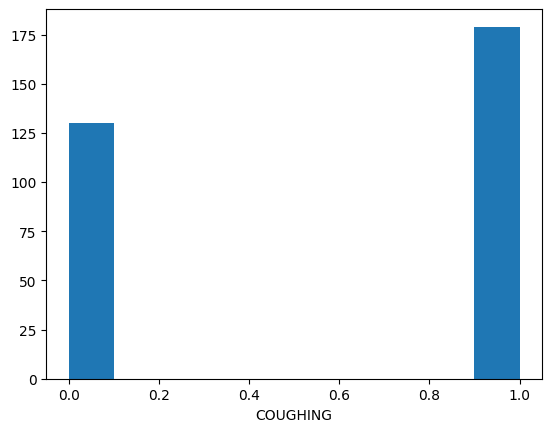

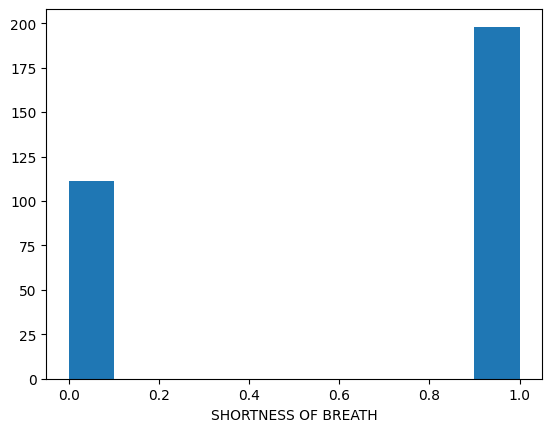

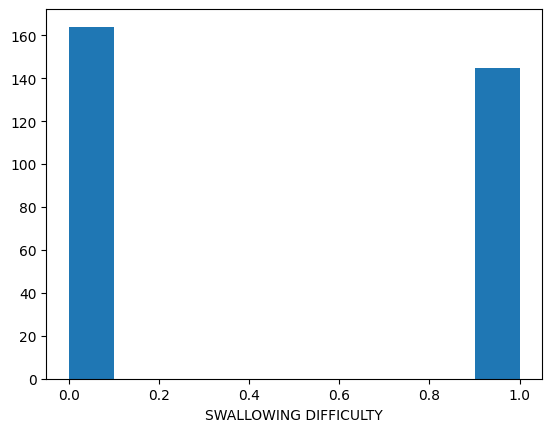

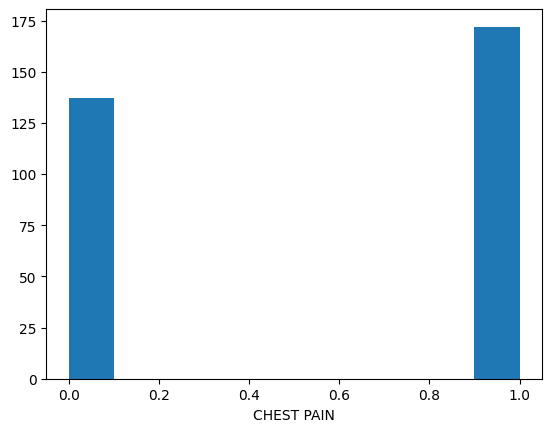

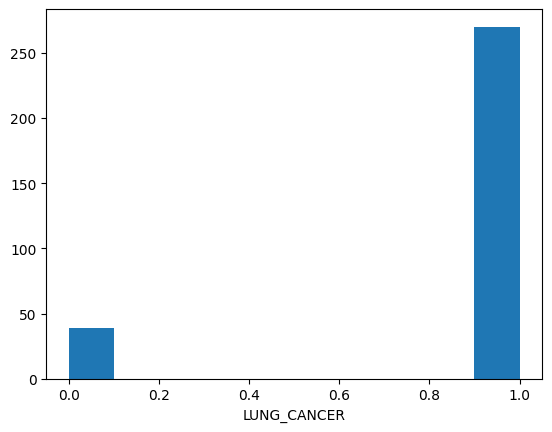

In [311]:
for attr in all_attributes :
    plt.hist(data[attr])
    plt.xlabel(attr)
    plt.show()

nothing special here

In [312]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(data[new_all_attributes],data['LUNG_CANCER'],test_size=0.2)


so what is this thing doing here? well since i calculated all scores of models I need to store them somewhere with this function I can store it in place and when i want use them and draw a chart or anything I like to do 

In [313]:

def write_on_file(models_result:dict,model_name:str,description:str)->None:
    """ models result is key value data that should have accuracy ,recall and precision score , should have three keys,'accuracy', 'recall','precision'.
      models_name is name of model that we calculate scores. on it description is string who describe model based on its argument like how many depth and tree we have in random forest
      models_result should have 6 keys listed below 
      
        accuracy_score_train = key of models_result -> 'accuracy_train'
        accuracy_score_test = key of models_result -> 'accuracy_test'
        recall_score_train = key of models_result -> 'recall_train'
        recall_score_test = key of models_resul -> 'recall_test'
        precision_score_train = key of models_result -> 'precision_train'
        precision_score_test = key of models_result -> 'precision_test'
        (i just used -> for mentioning and it's not anything connect with typing )
       at last it save data on text file and close file
       """
    accuracy_score_train = models_result['accuracy_train']
    accuracy_score_test = models_result['accuracy_test']
    recall_score_train = models_result['recall_train']
    recall_score_test = models_result['recall_test']
    precision_score_train = models_result['precision_train']
    precision_score_test = models_result['precision_test']
    with open('models_accuracy_results.txt','a') as file:
        file.write(f'name of model is :\n{model_name}\n')
        file.write(f'with features of {description}\n')
        file.write('and this is model results\n')
        file.write(f'accuracy score for train is :\n{accuracy_score_train}\n')
        file.write(f'accuracy score for test is :\n{accuracy_score_test}\n')
        file.write(f'recall score for train is :\n{recall_score_train}\n')
        file.write(f'recall score for test is :\n{recall_score_test}\n')
        file.write(f'precision score for train is :\n{precision_score_train}\n')
        file.write(f'precision score for test is :\n{precision_score_test}\n')
        file.write('-'*80+'\n')
        file.close()

for next 23 cells i just used models and stored data in a file 

In [314]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
class model :
    def __init__(self):
        self.recall_test_dict={}
        self.accuracy_test_dict={}
        self.precision_test_dict={}
    def __call__(self,pred_y_train,pred_y_test,algorithm_name):
        model_result = dict()
        model_result['recall_test'] = recall_score(y_true=test_y,y_pred=pred_y_test)
        model_result['accuracy_test'] = accuracy_score(y_true=test_y,y_pred=pred_y_test)
        model_result['precision_test'] = precision_score(y_true=test_y,y_pred=pred_y_test)
        model_result['precision_train'] = precision_score(y_true=train_y,y_pred=pred_y_train)
        model_result['recall_train'] = recall_score(y_true=train_y,y_pred=pred_y_train)
        model_result['accuracy_train'] = accuracy_score(y_true=train_y,y_pred=pred_y_train)
        self.recall_test_dict[algorithm_name]=recall_score(y_true=test_y,y_pred=pred_y_test)
        self.accuracy_test_dict[algorithm_name]=accuracy_score(y_true=test_y,y_pred=pred_y_test)
        self.precision_test_dict[algorithm_name]=precision_score(y_true=test_y,y_pred=pred_y_test)
modelrecords=model()

In [315]:
from sklearn.svm import SVC
support_vector= SVC()
support_vector.fit(train_x, train_y)
p_y_test = support_vector.predict(test_x)
p_y_train = support_vector.predict(train_x)
modelrecords(p_y_train,p_y_test,'support_vector')

In [316]:
#checked this algorithm with any solver with max iterations count of 1000 and minimum 12  at last got the same
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score
logistic_regression= LogisticRegression()
logistic_regression.fit(train_x,train_y)
p_y_test = logistic_regression.predict(test_x)
p_y_train = logistic_regression.predict(train_x)
modelrecords(p_y_train,p_y_test,'logistic_regression')

In [317]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score
ridge_classifier= RidgeClassifier()
ridge_classifier.fit(train_x,train_y)
p_y_test = ridge_classifier.predict(test_x)
p_y_train = ridge_classifier.predict(train_x)
modelrecords(p_y_train,p_y_test,'ridge_classifier')

In [318]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score
dtc= DecisionTreeClassifier(min_samples_split=12,max_depth=130)
dtc.fit(train_x,train_y)
p_y_test = dtc.predict(test_x)
p_y_train = dtc.predict(train_x)
modelrecords(p_y_train,p_y_test,'dtc')

In [319]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_depth=100,criterion='gini')
rfc.fit(train_x,train_y)
p_y_test = rfc.predict(test_x)
p_y_train = rfc.predict(train_x)
modelrecords(p_y_train,p_y_test,'rfc')

In [320]:
from sklearn.neighbors import NearestCentroid
nearest_centroid= NearestCentroid()
nearest_centroid.fit(train_x,train_y)
p_y_test = nearest_centroid.predict(test_x)
p_y_train = nearest_centroid.predict(train_x)
modelrecords(p_y_train,p_y_test,'nearest_centroid')

In [321]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x,train_y)
p_y_test = knn.predict(test_x)
p_y_train = knn.predict(train_x)
modelrecords(p_y_train,p_y_test,'knn')

In [322]:
from sklearn.naive_bayes import CategoricalNB
categorical_nb= CategoricalNB(alpha=0.5,min_categories=10,)
categorical_nb.fit(train_x,train_y)
p_y_test = categorical_nb.predict(test_x)
p_y_train = categorical_nb.predict(train_x)
modelrecords(p_y_train,p_y_test,'categorical_nb')

In [323]:
from sklearn.naive_bayes import  GaussianNB
gaussian_nb= GaussianNB(var_smoothing=0.7)
gaussian_nb.fit(train_x, train_y)
p_y_test = gaussian_nb.predict(test_x)
p_y_train = gaussian_nb.predict(train_x)
modelrecords(p_y_train,p_y_test,'gaussian_nb')

In [324]:
from sklearn.linear_model import Perceptron
perceptron= Perceptron(tol=0.1,alpha=0.1,)
perceptron.fit(train_x,train_y)
p_y_test = perceptron.predict(test_x)
p_y_train = perceptron.predict(train_x)
modelrecords(p_y_train,p_y_test,'perceptron')

In [325]:
from sklearn.linear_model import LogisticRegressionCV
logistic_regression_cv= LogisticRegressionCV(cv=4,tol=0.0001)
logistic_regression_cv.fit(train_x,train_y)
p_y_test = logistic_regression_cv.predict(test_x)
p_y_train = logistic_regression_cv.predict(train_x)
modelrecords(p_y_train,p_y_test,'logistic_regression_cv')

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver='adam',random_state=42)
mlp.fit(train_x,train_y)
p_y_test = mlp.predict(test_x)
p_y_train = mlp.predict(train_x)
modelrecords(p_y_train,p_y_test,'mlp')

In [327]:
from sklearn.naive_bayes import MultinomialNB
Multinomial_NB=MultinomialNB()
Multinomial_NB.fit(train_x,train_y)
p_y_test = Multinomial_NB.predict(test_x)
p_y_train =Multinomial_NB.predict(train_x)
modelrecords(p_y_train,p_y_test,'Multinomial_NB')

In [328]:
from sklearn.neighbors import RadiusNeighborsClassifier
Radius_neighbors_classifier=RadiusNeighborsClassifier(radius=3.4)
Radius_neighbors_classifier.fit(train_x,train_y)
p_y_test = Radius_neighbors_classifier.predict(test_x)
p_y_train = Radius_neighbors_classifier.predict(train_x)
modelrecords(p_y_train,p_y_test,'Radius_neighbors_classifier')

In [329]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier('log_loss',max_iter=1000,random_state=42)
sgd.fit(train_x,train_y)
p_y_test = sgd.predict(test_x)
p_y_train = sgd.predict(train_x)
modelrecords(p_y_train,p_y_test,'sgd')

In [330]:
from sklearn.ensemble import BaggingClassifier
Bagging_classifier=BaggingClassifier()
Bagging_classifier.fit(train_x,train_y)
p_y_test = Bagging_classifier.predict(test_x)
p_y_train = Bagging_classifier.predict(train_x)
modelrecords(p_y_train,p_y_test,'Bagging_classifier')

In [331]:
from sklearn.naive_bayes import BernoulliNB
Bernoulli=BernoulliNB()
Bernoulli.fit(train_x,train_y)
p_y_test = Bernoulli.predict(test_x)
p_y_train = Bernoulli.predict(train_x)
modelrecords(p_y_train,p_y_test,'Bernoulli')

In [332]:
from sklearn.linear_model import PassiveAggressiveClassifier
PassiveAggressive_Classifier=PassiveAggressiveClassifier(C=0.5,random_state=42)
PassiveAggressive_Classifier.fit(train_x,train_y)
p_y_test = PassiveAggressive_Classifier.predict(test_x)
p_y_train = PassiveAggressive_Classifier.predict(train_x)
modelrecords(p_y_train,p_y_test,'PassiveAggressive_Classifier')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_boost_classifier=AdaBoostClassifier(n_estimators=70)
Ada_boost_classifier.fit(train_x,train_y)
p_y_test = Ada_boost_classifier.predict(test_x)
p_y_train = Ada_boost_classifier.predict(train_x)
modelrecords(p_y_train,p_y_test,'Ada_boost_classifier')

In [334]:
from sklearn.naive_bayes import ComplementNB
Complement_NB=ComplementNB(alpha=0.5)
Complement_NB.fit(train_x,train_y)
p_y_test = Complement_NB.predict(test_x)
p_y_train = Complement_NB.predict(train_x)
modelrecords(p_y_train,p_y_test,'Complement_NB')

In [ ]:
from lightgbm import LGBMClassifier
LGBM_classifier=LGBMClassifier()
LGBM_classifier.fit(train_x,train_y)
p_y_test = LGBM_classifier.predict(test_x)
p_y_train = LGBM_classifier.predict(train_x)
modelrecords(p_y_train,p_y_test,'LGBM_classifier')

In [336]:
def read_on_file()->list[dict[str:str]]:
   """  Reads a text file containing model accuracy results and stores the data in a list of dictionaries.

    Each dictionary contains the following keys:
    - 'model_name': Name of the model
    - 'accuracy_train': Accuracy score on the training set
    - 'accuracy_test': Accuracy score on the test set
    - 'recall_train': Recall score on the training set
    - 'recall_test': Recall score on the test set
    - 'precision_train': Precision score on the training set
    - 'precision_test': Precision score on the test set

    Returns:
        list[dict[str, str]]: A list of dictionaries containing the model accuracy results.
    """
   mydata = []
   with open('models_accuracy_results.txt','r') as file:
       record_of_model = file.readlines()
       i = 0
       while i < len(record_of_model):
            i+=1
            model_name = record_of_model[i]
            i+=4
            accuracy_score_train = record_of_model[i]
            i+=2
            accuracy_score_test = record_of_model[i]
            i+=2
            recall_score_train = record_of_model[i]
            i+=2 
            recall_score_test = record_of_model[i]
            i+=2
            precision_score_train = record_of_model[i]
            i+=2
            precision_score_test = record_of_model[i]
            i+=2
            values = {
                 'accuracy_train':accuracy_score_train.strip(),'accuracy_test':accuracy_score_test.strip(),'recall_train':recall_score_train.strip(),
                  'recall_test':recall_score_test.strip(),
                 'precision_train':precision_score_train.strip(),
                 'precision_test':precision_score_test.strip(),
                 'model_name':model_name.strip(),
            }
            mydata.append(values)
       file.close()
   return  mydata

just get data nothing special

In [337]:
model_records = read_on_file()

this for showing scores of data and pls for reminder if you want to add data key and use data above we used in records 

In [338]:
def show_model_charts(model_records:list[dict[str:str]],data_key:str)->None:
    """so this is function get data and records and key to show a specific chart about specific score of model precision recall accuracy.
    well colors just choose randomly for bar charts that we try to use 
    model_records -> is list of dict and contain models result names and scores 
    data_key -> is str  and score of model  we want to draw a chart about it
    like accuracy_train and in the end 
    we should get a bar chart 
    """
    color_dict = mcolors.CSS4_COLORS
    fig, ax = plt.subplots()
    model_names = []
    measurements = [] 
    bar_colors = []
    for model_record in model_records:
        color_key = choice(list(color_dict.keys()))
        color_name = color_dict[color_key]
        color_dict.pop(color_key)
        model_names.append(model_record['model_name'])
        measurements.append(float(model_record[data_key])*100)
        bar_colors.append(color_name)
    ax.bar(model_names, measurements, color=bar_colors,)
    ax.set_title(f'this is score of  {data_key.replace("_"," ")} of models ')
    ax.set_ylabel('scores')
    ax.set_yticks(range(0,101,5))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

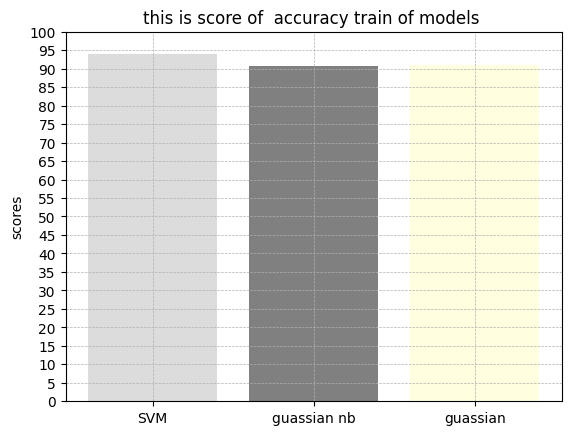

In [339]:
show_model_charts(model_records = model_records,data_key='accuracy_train')

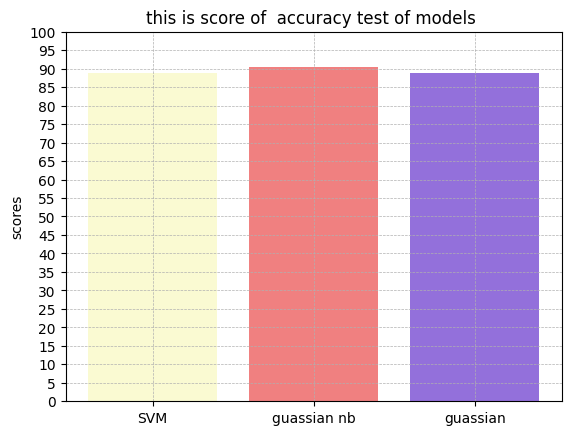

In [340]:
show_model_charts(model_records = model_records,data_key='accuracy_test')

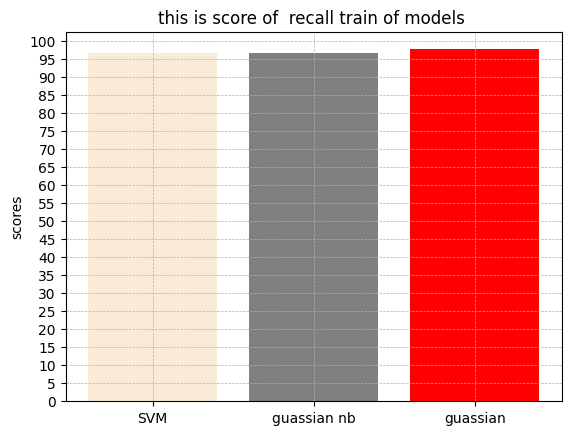

In [341]:
show_model_charts(model_records=model_records, data_key='recall_train')


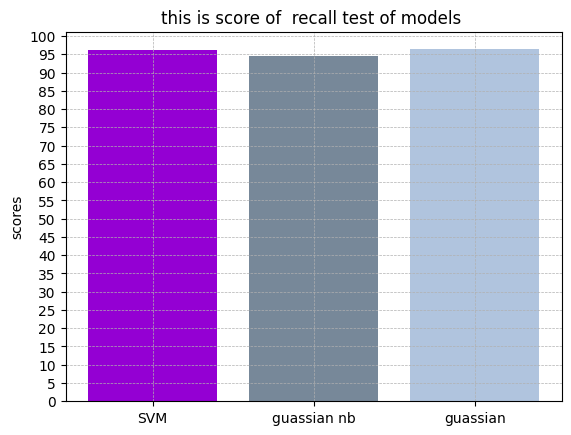

In [342]:
show_model_charts(model_records=model_records, data_key='recall_test')


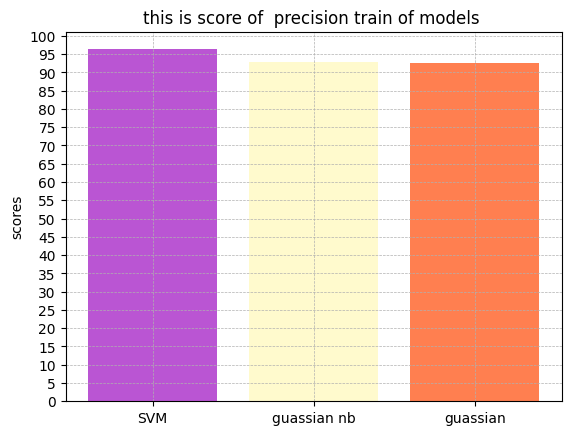

In [343]:
show_model_charts(model_records = model_records ,data_key='precision_train')


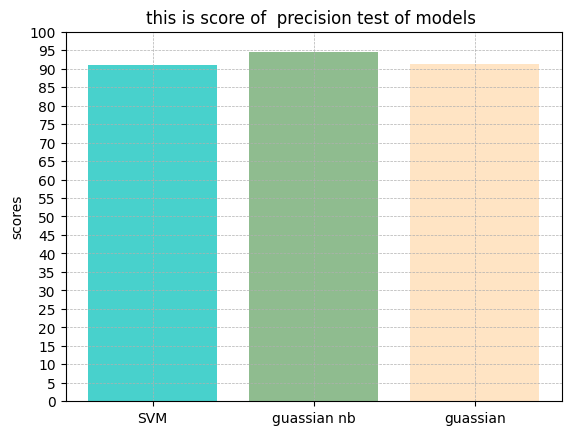

In [344]:

show_model_charts(model_records = model_records ,data_key='precision_test')

## choosing the right model for this data

In [ ]:
#better model :max recall test > max accuracy test > max precision test
max_recall_value=max(modelrecords.recall_test_dict.values())
max_recall_key=[key for key , value in modelrecords.recall_test_dict.items() if value==max_recall_value]
accuracy_test_dict={key : value for key,value in modelrecords.accuracy_test_dict.items() if key in max_recall_key}
max_accuracy_value=max(accuracy_test_dict.values())
max_accuracy_key=[key for key , value in accuracy_test_dict.items() if value==max_accuracy_value]
precision_test_dict={key : value for key,value in modelrecords.precision_test_dict.items() if key in max_accuracy_key}
max_precision_value=max(precision_test_dict.values())
max_precision_key=[key for key , value in precision_test_dict.items() if value==max_precision_value]
print(f"{max_precision_key} is the best model for this dataset")
